# Requirements

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns

In [2]:
# Add as many imports as you need.
print('hi')

hi


## Obesity Analysis


# Dataset Description

## Attributes

- id: represents a unique identifier for each participant or record in the dataset.
- Gender: Represents the gender of the individual.
- Age: Indicates the age of the individual.
- Height - Represents the height of the individual.
- Weight: Represents the weight of the individual.
- FCVC Frequency of Consumption of Vegetables
- NCP - Number of Main Meals per Day
- SMOKE - Indicates whether the individual smokes
- CH2O - Consumption of Water
- TUE - Time Using Electronic Devices
- MTRANS - Mode of Transportation
- NObeyesdad - Nutritional Obesity Status, obesity class

### Target variable
- FAF Frequency of Physical Activity

# Read the dataset

In [81]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('obesity-27-11.csv')
df.sample(5)

Unnamed: 0       id Gender        Age    Height      Weight      FCVC  \
14789       14789  14789.0   Male  26.826961  1.826970  120.975489       NaN   
19032       19032  19032.0   Male  18.000000  1.650000   90.000000  2.000000   
4880         4880   4880.0    NaN  23.694840  1.661715  113.234349  3.000000   
263           263    263.0   Male        NaN  1.755938   52.331172  2.000000   
13239       13239  13239.0   Male        NaN       NaN   98.912261  2.315932   

            NCP SMOKE      CH2O       FAF       TUE                 MTRANS  \
14789  3.000000    no       NaN  0.742113  0.265790  Public_Transportation   
19032       NaN    no  1.000000  0.000000  2.000000  Public_Transportation   
4880        NaN    no  2.073497  0.062932  0.723154  Public_Transportation   
263         NaN    no       NaN  0.281734  1.488372                    NaN   
13239  2.358455   NaN  2.902682  2.236586       NaN             Automobile   

                NObeyesdad  
14789      Obesity_Type_II  
19032       Obesity_Type_I  
4880                   NaN  
263    Insufficient_Weight  
13239                  NaN

Explore the dataset using visualizations of your choice.

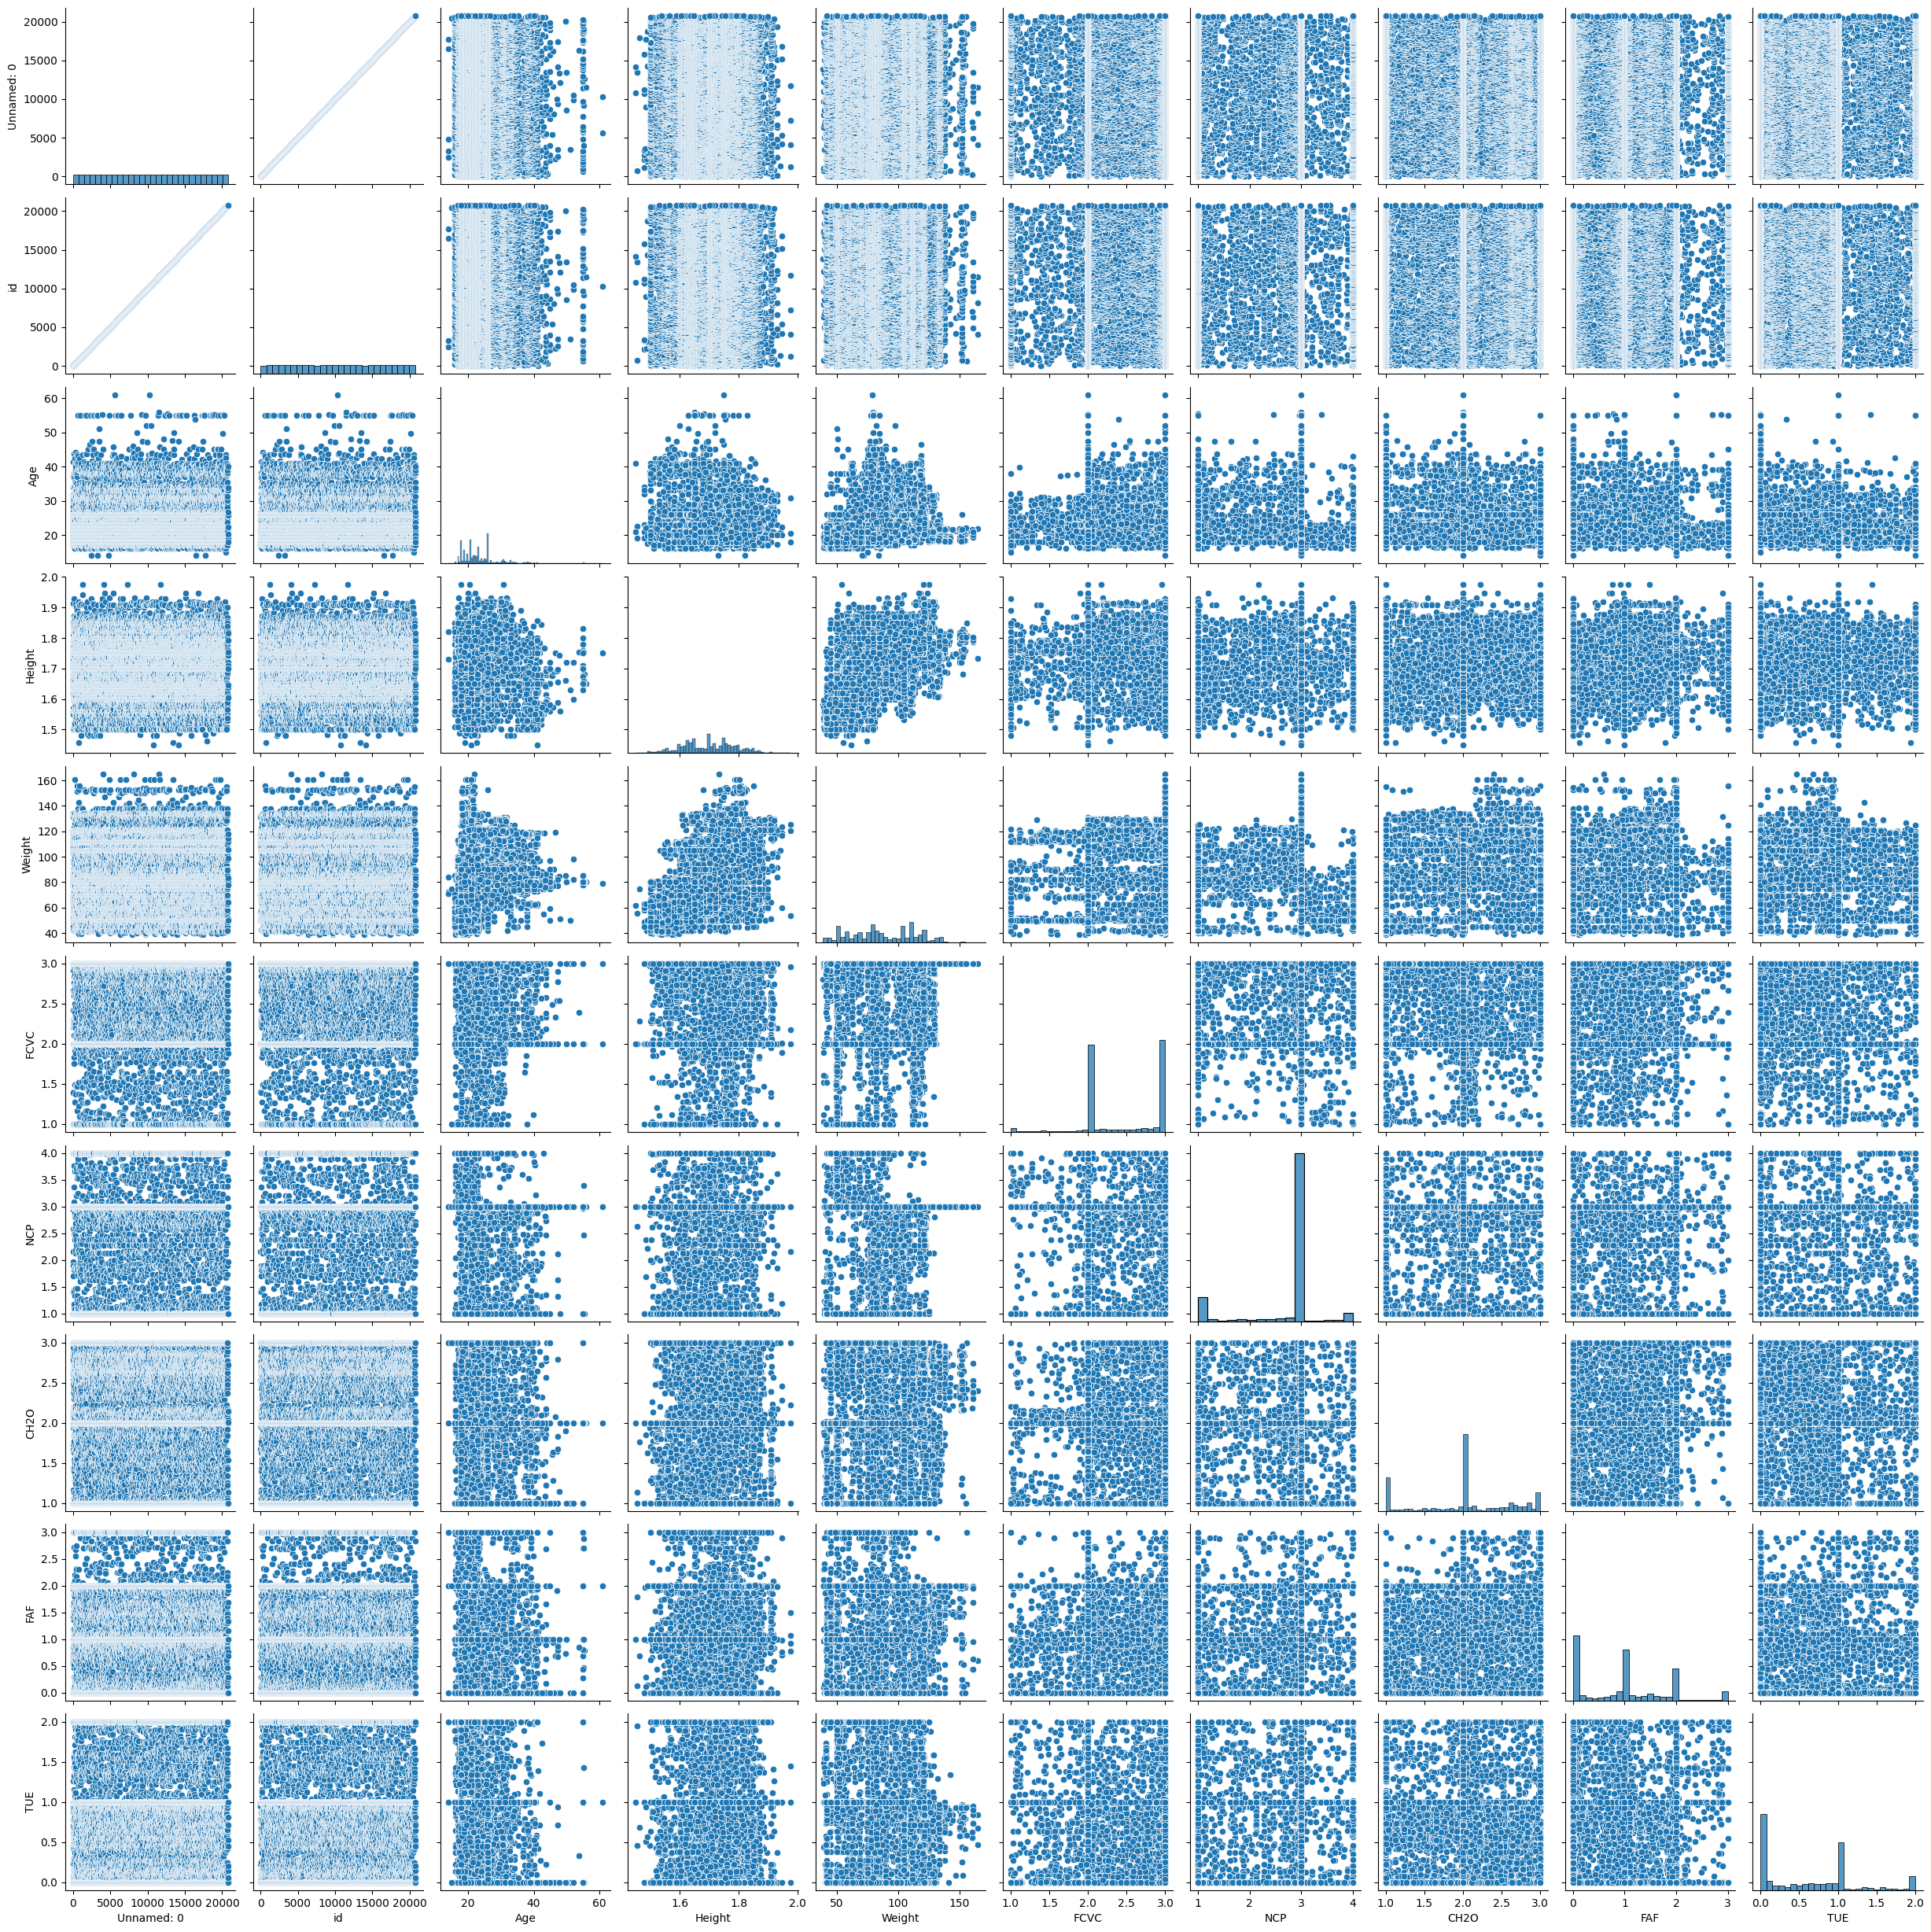

In [4]:
# Write your code here. Add as many boxes as you need.
sns.pairplot(df)

<Axes: >

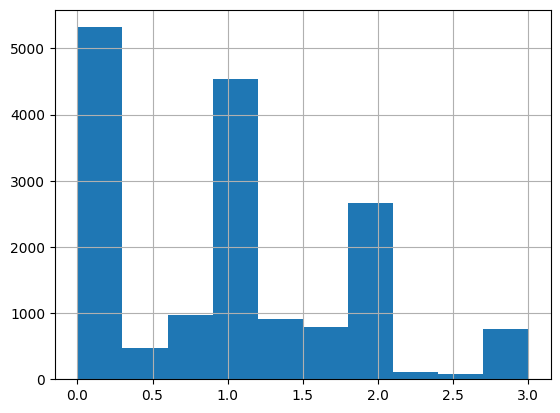

In [82]:
df['FAF'].hist()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [83]:
# Write your code here. Add as many boxes as you need.
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_percent

column  percent missing
0   Unnamed: 0         0.000000
1           id        19.944118
2       Gender        19.867039
3          Age        19.992292
4       Height        19.708064
5       Weight        20.623374
6         FCVC        19.833317
7          NCP        19.563542
8        SMOKE        19.799595
9         CH2O        20.045284
10         FAF        19.939301
11         TUE        19.977840
12      MTRANS        20.030831
13  NObeyesdad        19.910396

In [84]:
df.drop(['id', 'Unnamed: 0'],axis=1, inplace=True)
df

Gender        Age    Height      Weight      FCVC       NCP SMOKE  \
0        Male  24.443011  1.699998   81.669950  2.000000  2.983297    no   
1      Female  18.000000  1.560000   57.000000  2.000000  3.000000    no   
2      Female  18.000000       NaN   50.165754       NaN  1.411685    no   
3         NaN  20.952737  1.710730  131.274851  3.000000  3.000000    no   
4        Male  31.641081  1.914186         NaN       NaN  1.971472    no   
...       ...        ...       ...         ...       ...       ...   ...   
20753     NaN        NaN       NaN  114.187096  2.919584  3.000000    no   
20754    Male  18.000000  1.710000   50.000000       NaN       NaN    no   
20755    Male  20.101026  1.819557  105.580491  2.407817  3.000000    no   
20756     NaN  33.852953  1.700000   83.520113       NaN  1.971472   NaN   
20757    Male  26.680376  1.816547  118.134898  3.000000  3.000000    no   

           CH2O       FAF       TUE                 MTRANS  \
0      2.763573  0.000000  0.976473  Public_Transportation   
1           NaN       NaN  1.000000             Automobile   
2           NaN  0.866045       NaN  Public_Transportation   
3      1.674061  1.467863  0.780199  Public_Transportation   
4           NaN  1.967973  0.931721  Public_Transportation   
...         ...       ...       ...                    ...   
20753  2.151809  1.330519  0.196680  Public_Transportation   
20754  1.000000       NaN       NaN                    NaN   
20755  2.000000  1.158040  1.198439  Public_Transportation   
20756  2.144838  0.000000       NaN                    NaN   
20757  2.003563  0.684487  0.713823  Public_Transportation   

                NObeyesdad  
0                      NaN  
1            Normal_Weight  
2      Insufficient_Weight  
3                      NaN  
4      Overweight_Level_II  
...                    ...  
20753      Obesity_Type_II  
20754  Insufficient_Weight  
20755                  NaN  
20756                  NaN  
20757      Obesity_Type_II  

[20758 rows x 12 columns]

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

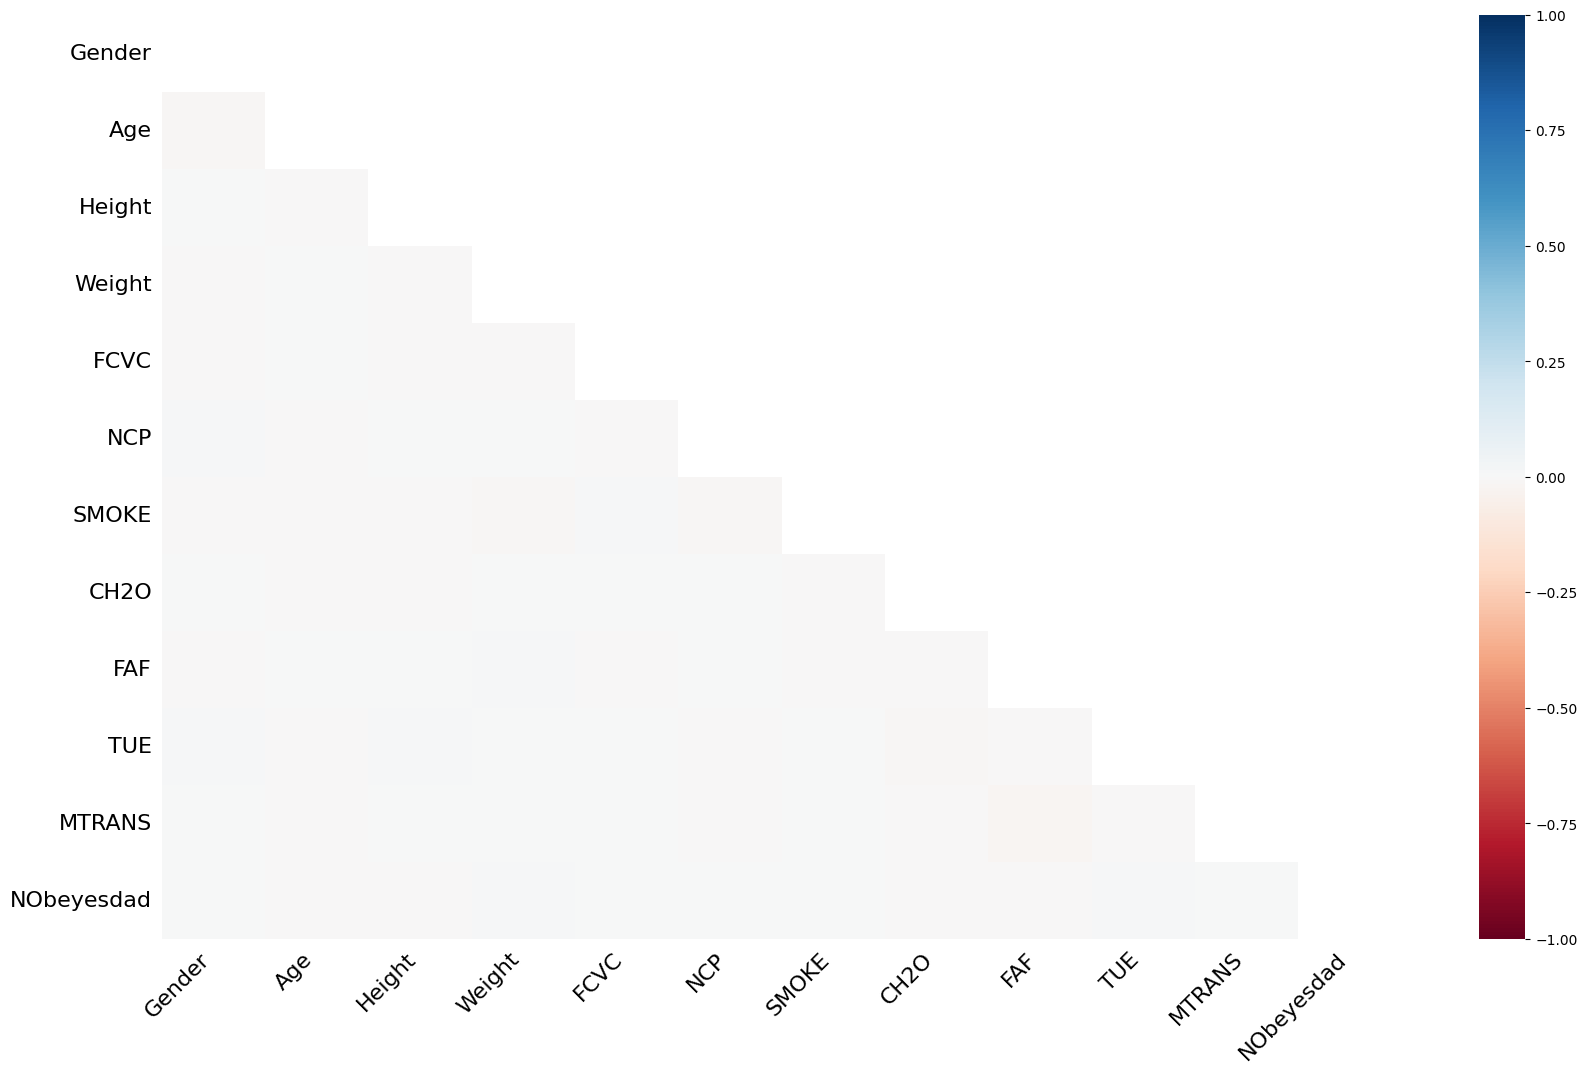

In [85]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(df)

<Axes: >

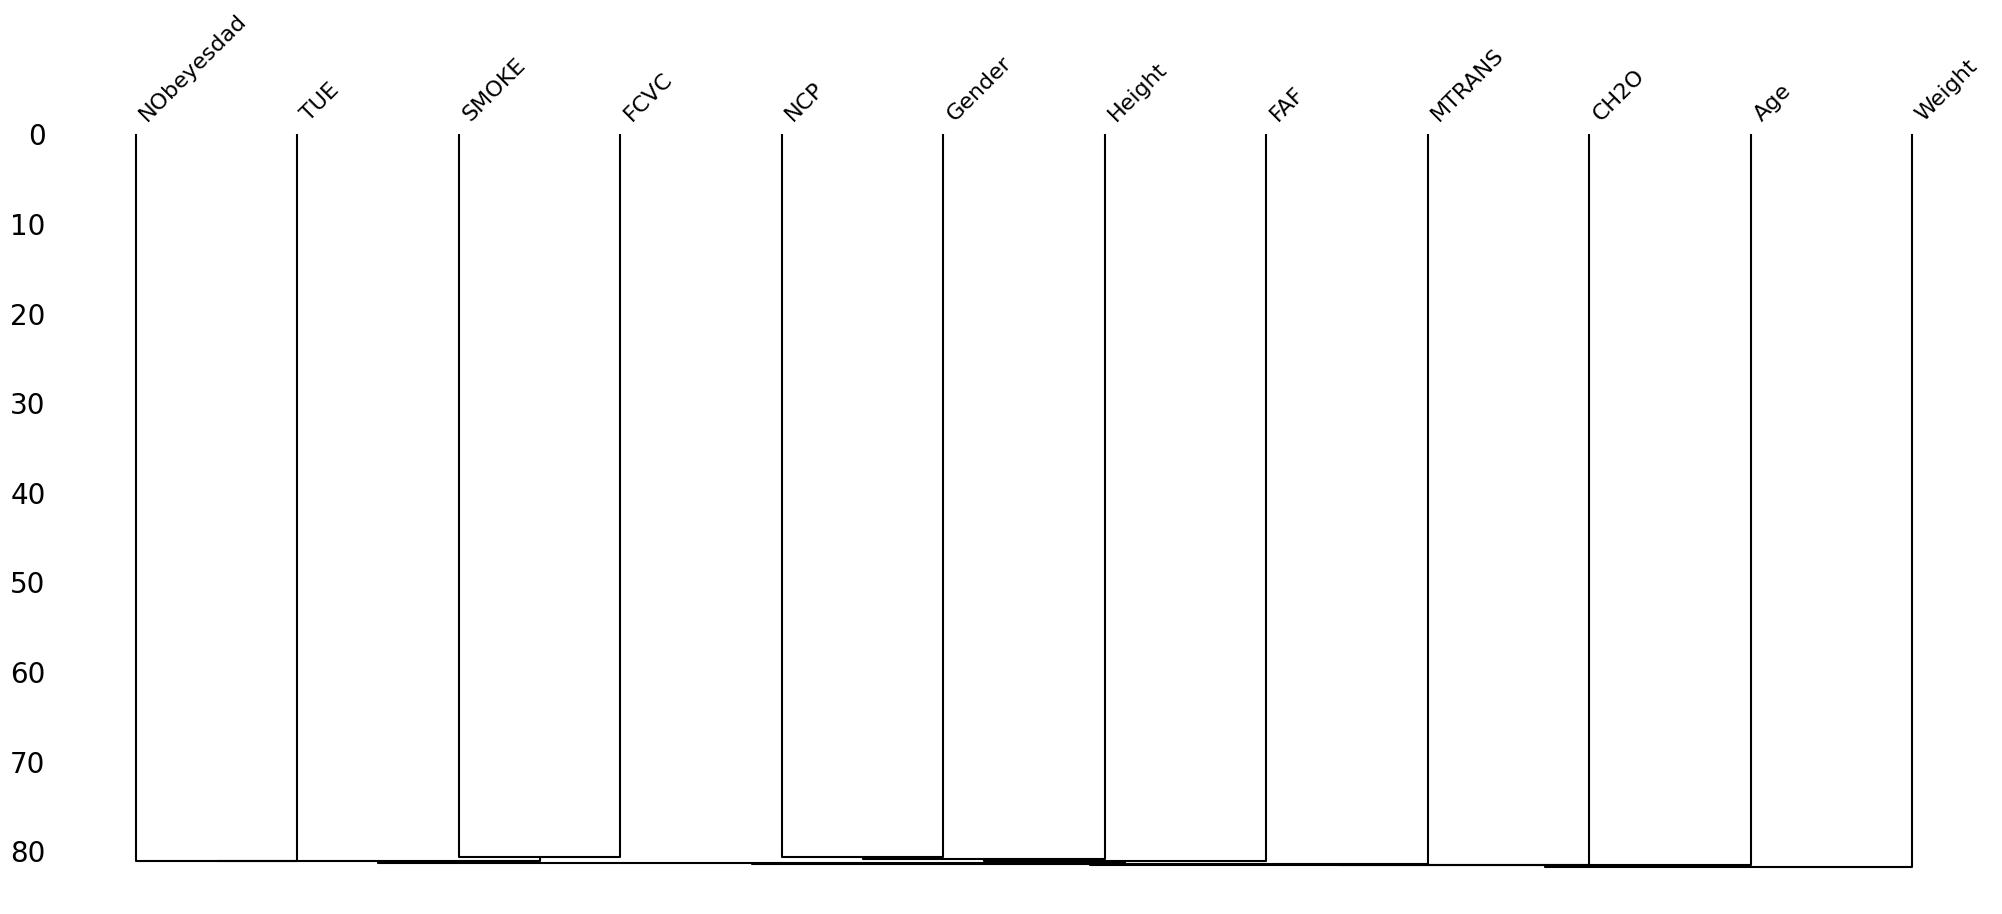

In [86]:
msno.dendrogram(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [87]:
age_mean = df['Age'].mean()
weight_mean = df['Weight'].mean()
height_mean = df['Height'].mean()

df['Age'].fillna(age_mean, inplace=True)
df['Weight'].fillna(weight_mean, inplace=True)
df['Height'].fillna(height_mean, inplace=True)
df['CH2O'].fillna(df['CH2O'].mean(), inplace=True)
df['NCP'].fillna(df['NCP'].mean(), inplace=True)
df['FCVC'].fillna(df['FCVC'].mean(), inplace=True)
df['TUE'].fillna(df['TUE'].mean(), inplace=True)

df.isnull().sum()

Gender        4124
Age              0
Height           0
Weight           0
FCVC             0
NCP              0
SMOKE         4110
CH2O             0
FAF           4139
TUE              0
MTRANS        4158
NObeyesdad    4133
dtype: int64

In [88]:
df['Gender'].bfill(inplace=True)
df['SMOKE'].bfill(inplace=True)
df.isnull().sum()

Gender           0
Age              0
Height           0
Weight           0
FCVC             0
NCP              0
SMOKE            0
CH2O             0
FAF           4139
TUE              0
MTRANS        4158
NObeyesdad    4133
dtype: int64

In [89]:
mtrans_most_freq = df['MTRANS'].mode()
df['MTRANS'].fillna(mtrans_most_freq[0], inplace=True)
df.isna().sum()

Gender           0
Age              0
Height           0
Weight           0
FCVC             0
NCP              0
SMOKE            0
CH2O             0
FAF           4139
TUE              0
MTRANS           0
NObeyesdad    4133
dtype: int64

In [90]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['NObeyesdad'] = encoder.fit_transform(df['NObeyesdad'])
df.isna().sum()

Gender           0
Age              0
Height           0
Weight           0
FCVC             0
NCP              0
SMOKE            0
CH2O             0
FAF           4139
TUE              0
MTRANS           0
NObeyesdad       0
dtype: int64

In [91]:
# Write your code here. Add as many boxes as you need.
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
df['NObeyesdad'] = knn_imputer.fit_transform(df['NObeyesdad'].to_numpy().reshape(-1,1))
df.isna().sum()
df.sample(6)

Gender        Age    Height      Weight      FCVC       NCP SMOKE  \
14357    Male  24.920362  1.848553  121.864326  2.497548  2.993634    no   
15997  Female  22.000000  1.550000   42.000000  2.445041  1.000000    no   
11855    Male  25.919571  1.610488  102.174953  3.000000  3.000000    no   
13952  Female  22.975526  1.753081   87.905350  2.967853  3.000000    no   
10471  Female  26.000000  1.700150  109.982692  3.000000  3.000000    no   
321      Male  17.441593  1.700000   59.243506  2.000000  3.000000    no   

           CH2O  FAF       TUE                 MTRANS  NObeyesdad  
14357  2.010596  NaN  0.896105  Public_Transportation         3.0  
15997  1.000000  NaN  0.000000             Automobile         0.0  
11855  1.032834  NaN  0.912457  Public_Transportation         4.0  
13952  1.666160  NaN  1.000000  Public_Transportation         0.0  
10471  2.688229  0.0  0.618256  Public_Transportation         7.0  
321    2.000000  2.0  1.000000             Automobile         0.0

In [92]:
df['FAF'].fillna(df['FAF'].mean(),inplace=True)
df.isna().sum()

Gender        0
Age           0
Height        0
Weight        0
FCVC          0
NCP           0
SMOKE         0
CH2O          0
FAF           0
TUE           0
MTRANS        0
NObeyesdad    0
dtype: int64

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [96]:
df['MTRANS'] = encoder.fit_transform(df['MTRANS'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['SMOKE'] = encoder.fit_transform(df['SMOKE'])

In [98]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df['NObeyesdad'] = scaler.fit_transform(df['NObeyesdad'].to_numpy().reshape(-1,1))
df

Gender        Age    Height      Weight      FCVC       NCP  SMOKE  \
0           1  24.443011  1.699998   81.669950  2.000000  2.983297      0   
1           0  18.000000  1.560000   57.000000  2.000000  3.000000      0   
2           0  18.000000  1.700150   50.165754  2.445041  1.411685      0   
3           1  20.952737  1.710730  131.274851  3.000000  3.000000      0   
4           1  31.641081  1.914186   87.905350  2.445041  1.971472      0   
...       ...        ...       ...         ...       ...       ...    ...   
20753       1  23.850701  1.700150  114.187096  2.919584  3.000000      0   
20754       1  18.000000  1.710000   50.000000  2.445041  2.759481      0   
20755       1  20.101026  1.819557  105.580491  2.407817  3.000000      0   
20756       1  33.852953  1.700000   83.520113  2.445041  1.971472      0   
20757       1  26.680376  1.816547  118.134898  3.000000  3.000000      0   

           CH2O       FAF       TUE  MTRANS  NObeyesdad  
0      2.763573  0.000000  0.976473       3    1.000000  
1      2.027584  0.975865  1.000000       0    0.142857  
2      2.027584  0.866045  0.618256       3    0.000000  
3      1.674061  1.467863  0.780199       3    1.000000  
4      2.027584  1.967973  0.931721       3    0.857143  
...         ...       ...       ...     ...         ...  
20753  2.151809  1.330519  0.196680       3    0.428571  
20754  1.000000  0.975865  0.618256       3    0.000000  
20755  2.000000  1.158040  1.198439       3    1.000000  
20756  2.144838  0.000000  0.618256       3    1.000000  
20757  2.003563  0.684487  0.713823       3    0.428571  

[20758 rows x 12 columns]

## Hyper-parameter optimization

Train an XGBoost Model, optimize it's hyper-parameters with grid-search and 5-fold cross validation on the training set.

In [101]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

X = df.drop(['FAF'], axis=1)
y = df['FAF']


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = XGBRegressor()


param_grid = {
    'n_estimators': [100, 200,300],
    'learning_rate': [0.01, 0.05,0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs = -1, verbose =1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}


# Cross-validation evaluation

Perform leave-one out cross validation on the entire dataset, with an untrained model with the chosen hyper-parameters from the previous step.

In [105]:
# Write your code here. Add as many boxes as you need.
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("R2:",r2_score(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

R2: 0.2846519134717994
MSE: 0.3947108128920841
MAE: 0.4723137044168142


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [106]:
# Write your code here. Add as many boxes as you need.
# Write your code here. Add as many boxes as you need.
print("R2:",r2_score(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

R2: 0.2846519134717994
MSE: 0.3947108128920841
MAE: 0.4723137044168142
